In [16]:
from torchsummary import summary

In [17]:
import hiddenlayer as hl

In [18]:
from model import deeplabv3plus_resnet101

In [19]:
import torch

In [20]:
model = deeplabv3plus_resnet101(num_classes=2)

In [7]:
help(summary)

Help on function summary in module torchsummary.torchsummary:

summary(model, input_size, batch_size=-1, device='cuda')



In [ ]:
torch.zeros([2,3,512,512])

In [8]:
summary(model, (3,512,512), device='cpu')

AttributeError: 'collections.OrderedDict' object has no attribute 'size'

In [9]:
!pip install pytorch-model-summary

In [10]:
from pytorch_model_summary import summary

In [14]:
print(summary(model.classifier, {
    'low_level':torch.zeros([2,256,128,128]),
    'out': torch.zeros([2,2048,64,64])
}), show_input=False, show_hierarchical=True)

AttributeError: 'dict' object has no attribute 'size'

In [ ]:
summary(model, (3,512,512), device='cpu')

In [9]:
for name, param in model.named_parameters():
    print(f'{name}: {param.shape}')

backbone.conv1.weight: torch.Size([64, 3, 7, 7])
backbone.bn1.weight: torch.Size([64])
backbone.bn1.bias: torch.Size([64])
backbone.layer1.0.conv1.weight: torch.Size([64, 64, 1, 1])
backbone.layer1.0.bn1.weight: torch.Size([64])
backbone.layer1.0.bn1.bias: torch.Size([64])
backbone.layer1.0.conv2.weight: torch.Size([64, 64, 3, 3])
backbone.layer1.0.bn2.weight: torch.Size([64])
backbone.layer1.0.bn2.bias: torch.Size([64])
backbone.layer1.0.conv3.weight: torch.Size([256, 64, 1, 1])
backbone.layer1.0.bn3.weight: torch.Size([256])
backbone.layer1.0.bn3.bias: torch.Size([256])
backbone.layer1.0.downsample.0.weight: torch.Size([256, 64, 1, 1])
backbone.layer1.0.downsample.1.weight: torch.Size([256])
backbone.layer1.0.downsample.1.bias: torch.Size([256])
backbone.layer1.1.conv1.weight: torch.Size([64, 256, 1, 1])
backbone.layer1.1.bn1.weight: torch.Size([64])
backbone.layer1.1.bn1.bias: torch.Size([64])
backbone.layer1.1.conv2.weight: torch.Size([64, 64, 3, 3])
backbone.layer1.1.bn2.weight: t

In [30]:
aspp_graph = hl.build_graph(model.classifier.aspp,
                       torch.zeros([2,2048,64,64]))

/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_helper.py:243: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_opset_version) + ". "
/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_opset9.py:1301: UserWarning: Dropout is a training op and should not be exported in inference mode. Make sure to call eval() on the model, and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


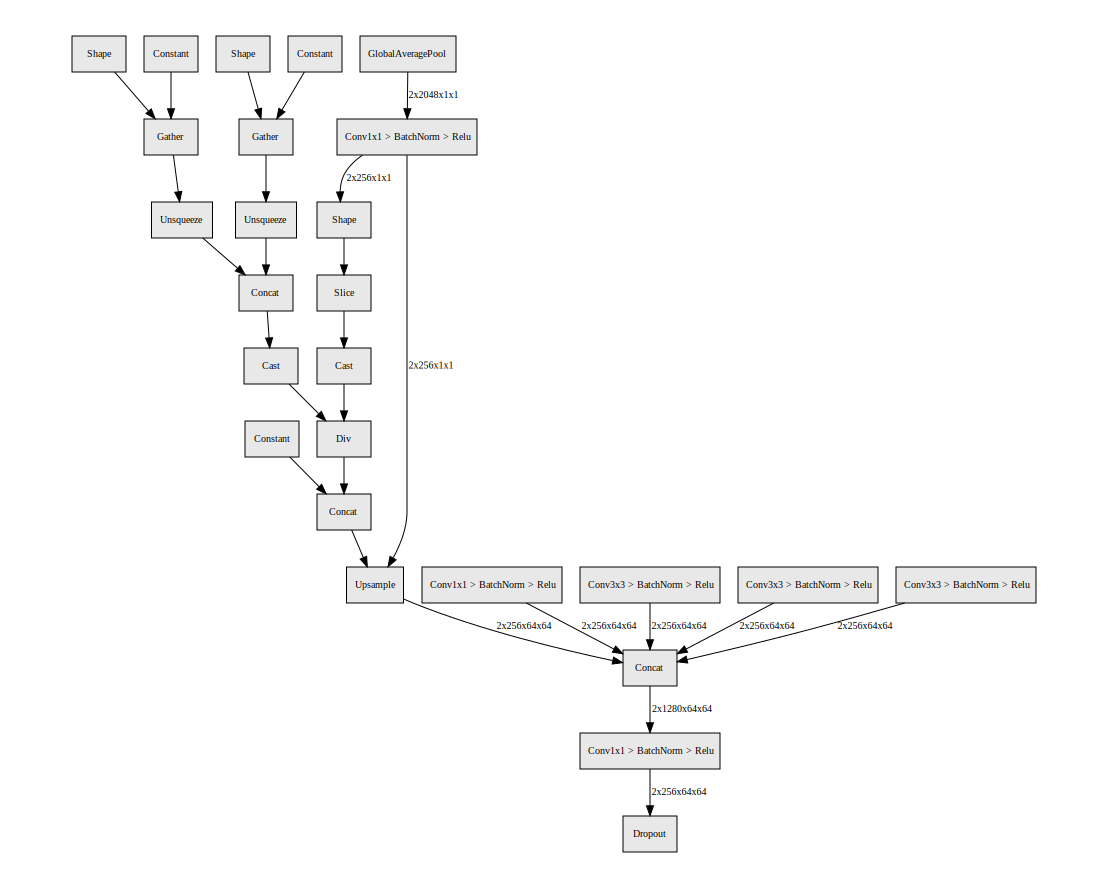

In [31]:
dot=aspp_graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown

dot

In [26]:
graph = hl.build_graph(model.classifier, {
    'low_level':torch.zeros([2,256,128,128]),
    'out': torch.zeros([2,2048,64,64])
})

/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_helper.py:243: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_opset_version) + ". "
/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_opset9.py:1301: UserWarning: Dropout is a training op and should not be exported in inference mode. Make sure to call eval() on the model, and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


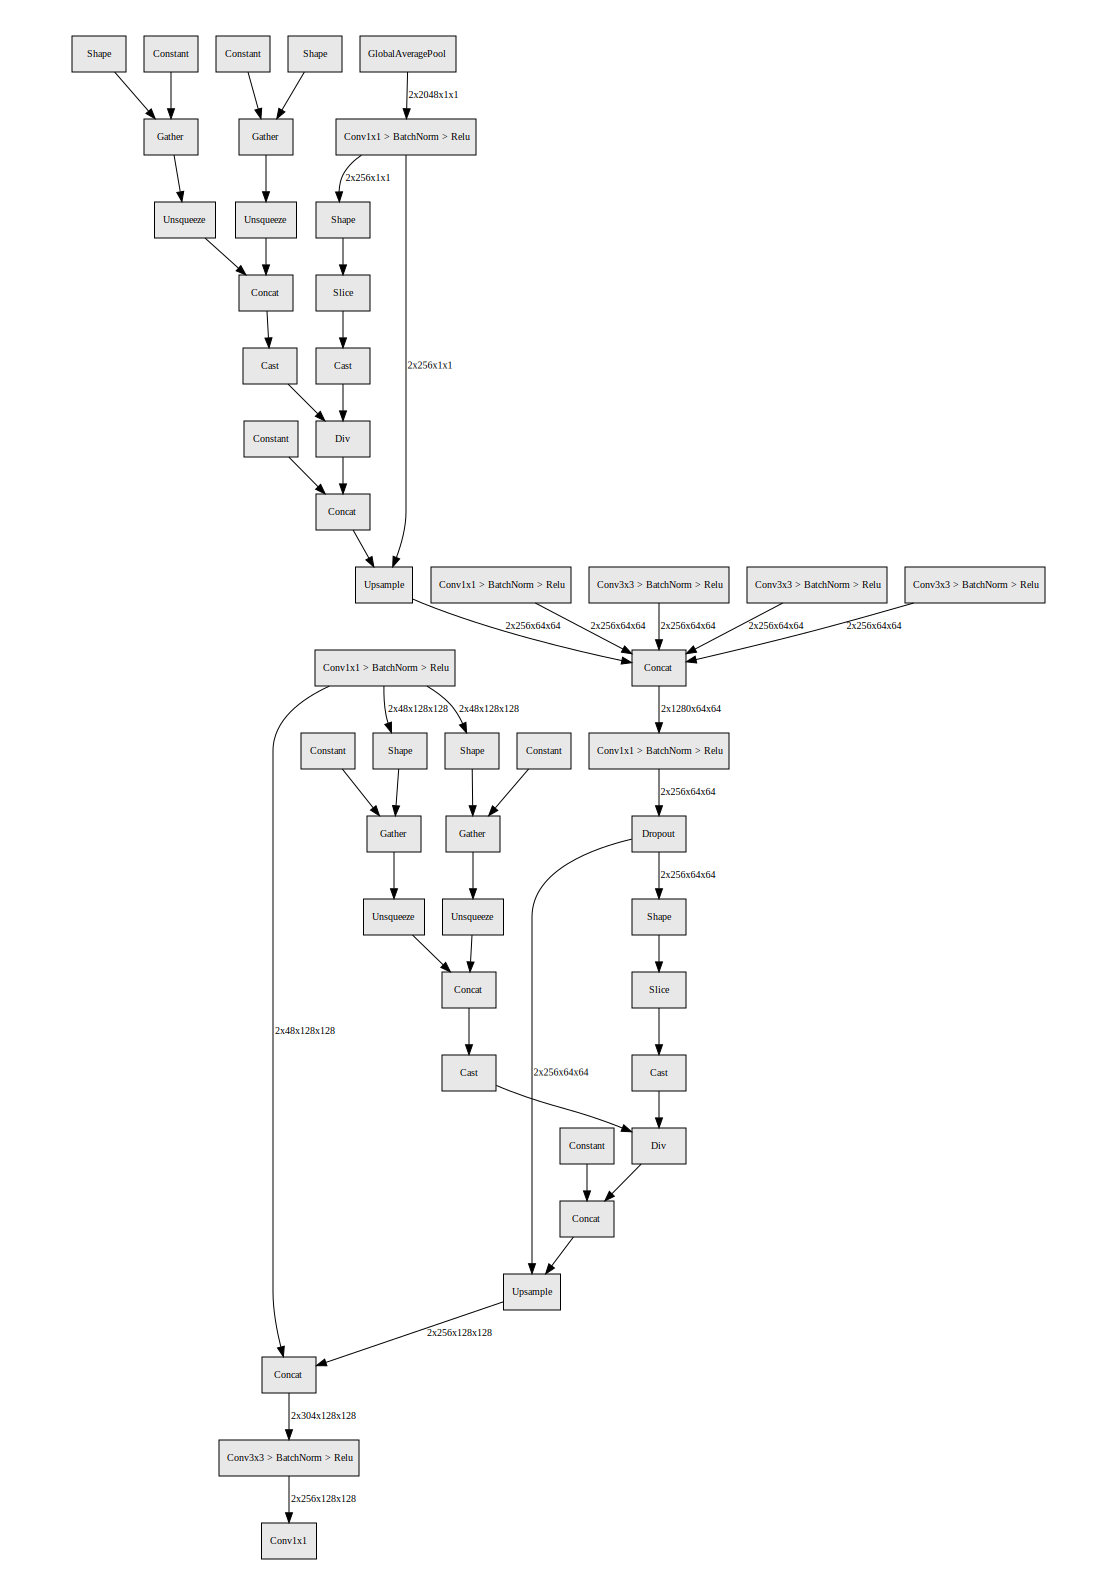

In [27]:
dot=graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown

dot

In [38]:
graph = hl.build_graph(model, torch.zeros([2, 3, 512,512]))

/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_helper.py:243: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_opset_version) + ". "
/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_opset9.py:1301: UserWarning: Dropout is a training op and should not be exported in inference mode. Make sure to call eval() on the model, and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


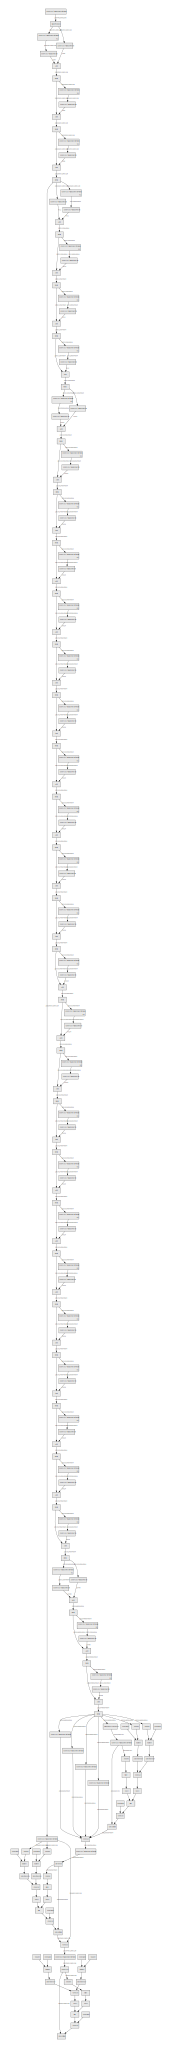

In [39]:
dot=graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown

dot

In [40]:
dot.render(filename='deeplabv3plus_architecture', format='png')

'deeplabv3plus_architecture.png'

In [41]:
backbone_graph = hl.build_graph(model.backbone, torch.zeros([2,3,512,512]))

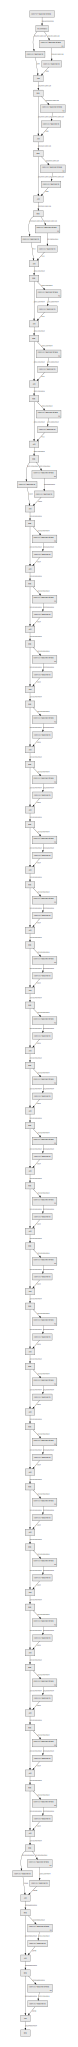

In [42]:
dot=backbone_graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown

dot

In [43]:
dot.render(filename='deeplabv3plus_backbone_architecture', format='png')

'deeplabv3plus_backbone_architecture.png'

In [44]:
classifier_graph = hl.build_graph(model.classifier, {
    'low_level':torch.zeros([2,256,128,128]),
    'out': torch.zeros([2,2048,64,64])
})

/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_helper.py:243: UserWarning: You are trying to export the model with onnx:Upsample for ONNX opset version 9. This operator might cause results to not match the expected results by PyTorch.
ONNX's Upsample/Resize operator did not match Pytorch's Interpolation until opset 11. Attributes to determine how to transform the input were added in onnx:Resize in opset 11 to support Pytorch's behavior (like coordinate_transformation_mode and nearest_mode).
We recommend using opset 11 and above for models using this operator. 
  "" + str(_export_onnx_opset_version) + ". "
/opt/conda/lib/python3.7/site-packages/torch/onnx/symbolic_opset9.py:1301: UserWarning: Dropout is a training op and should not be exported in inference mode. Make sure to call eval() on the model, and to export it with param training=False.
  warnings.warn("Dropout is a training op and should not be exported in inference mode. "


In [23]:
classifier_graph = hl.build_graph(model.classifier, {
    'low_level':torch.zeros([2,256,512,512]),
    'out': torch.zeros([2,2048,256,256])
})

RuntimeError: Given groups=1, weight of size [48, 256, 1, 1], expected input[2, 2, 512, 512] to have 256 channels, but got 2 channels instead

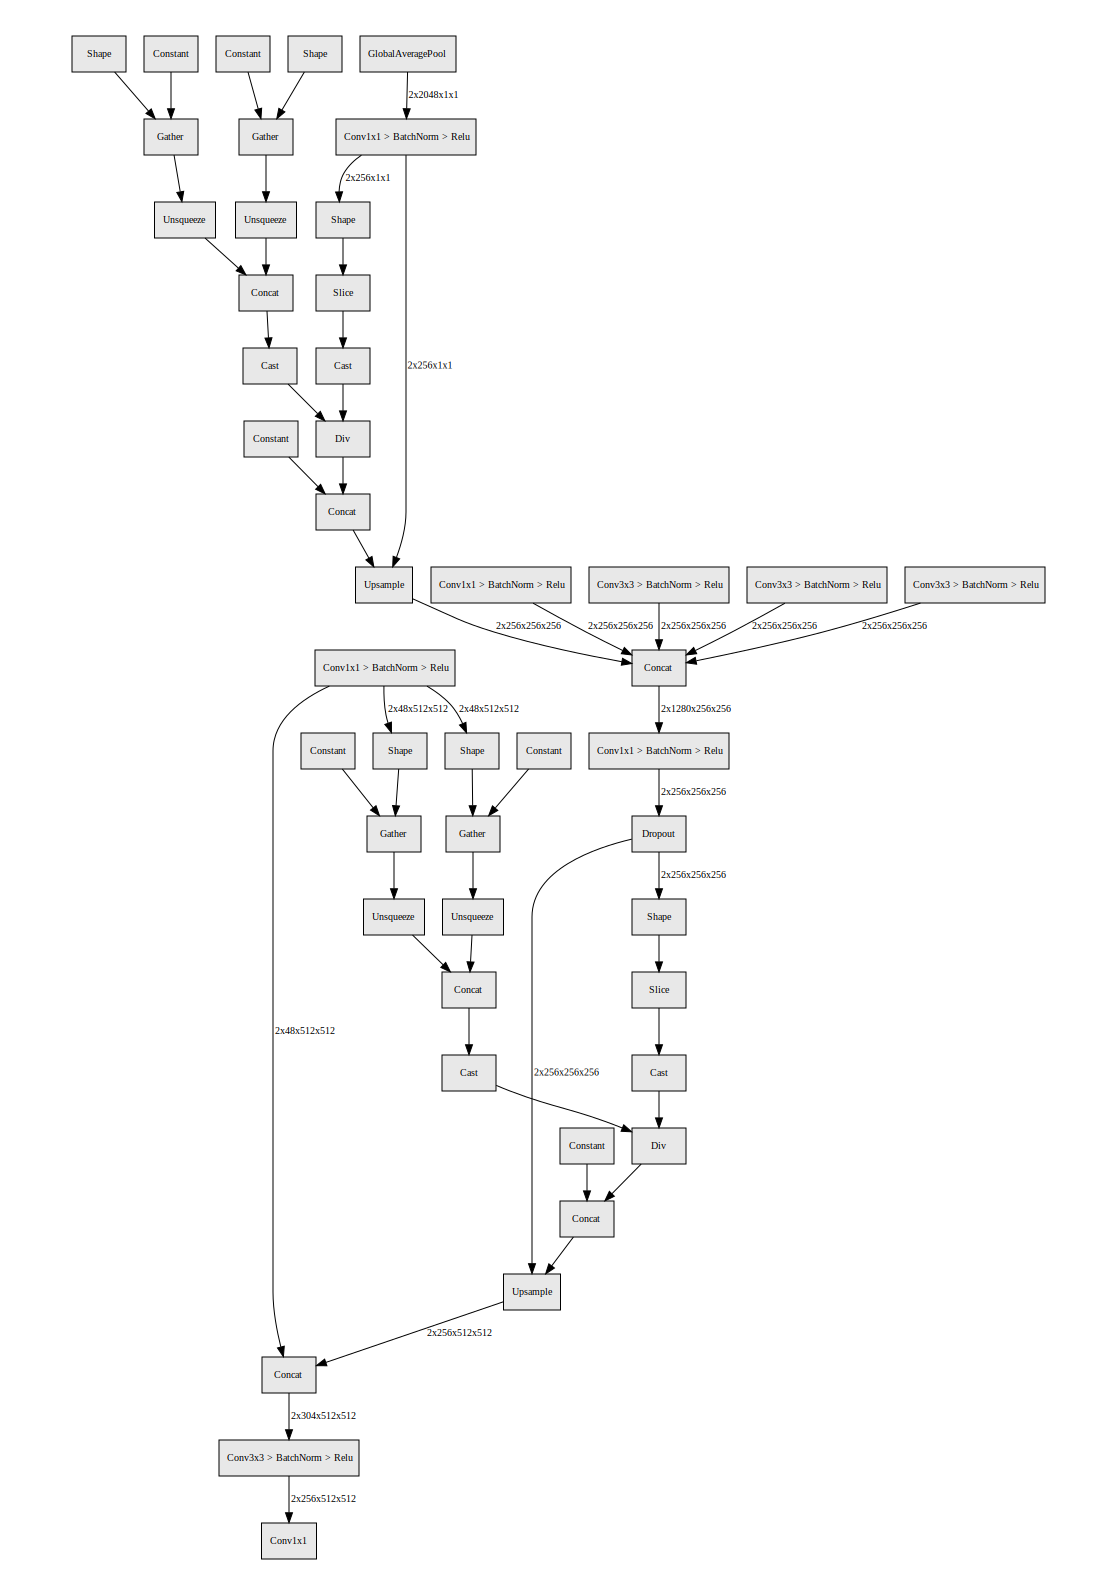

In [22]:
dot=classifier_graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown

dot

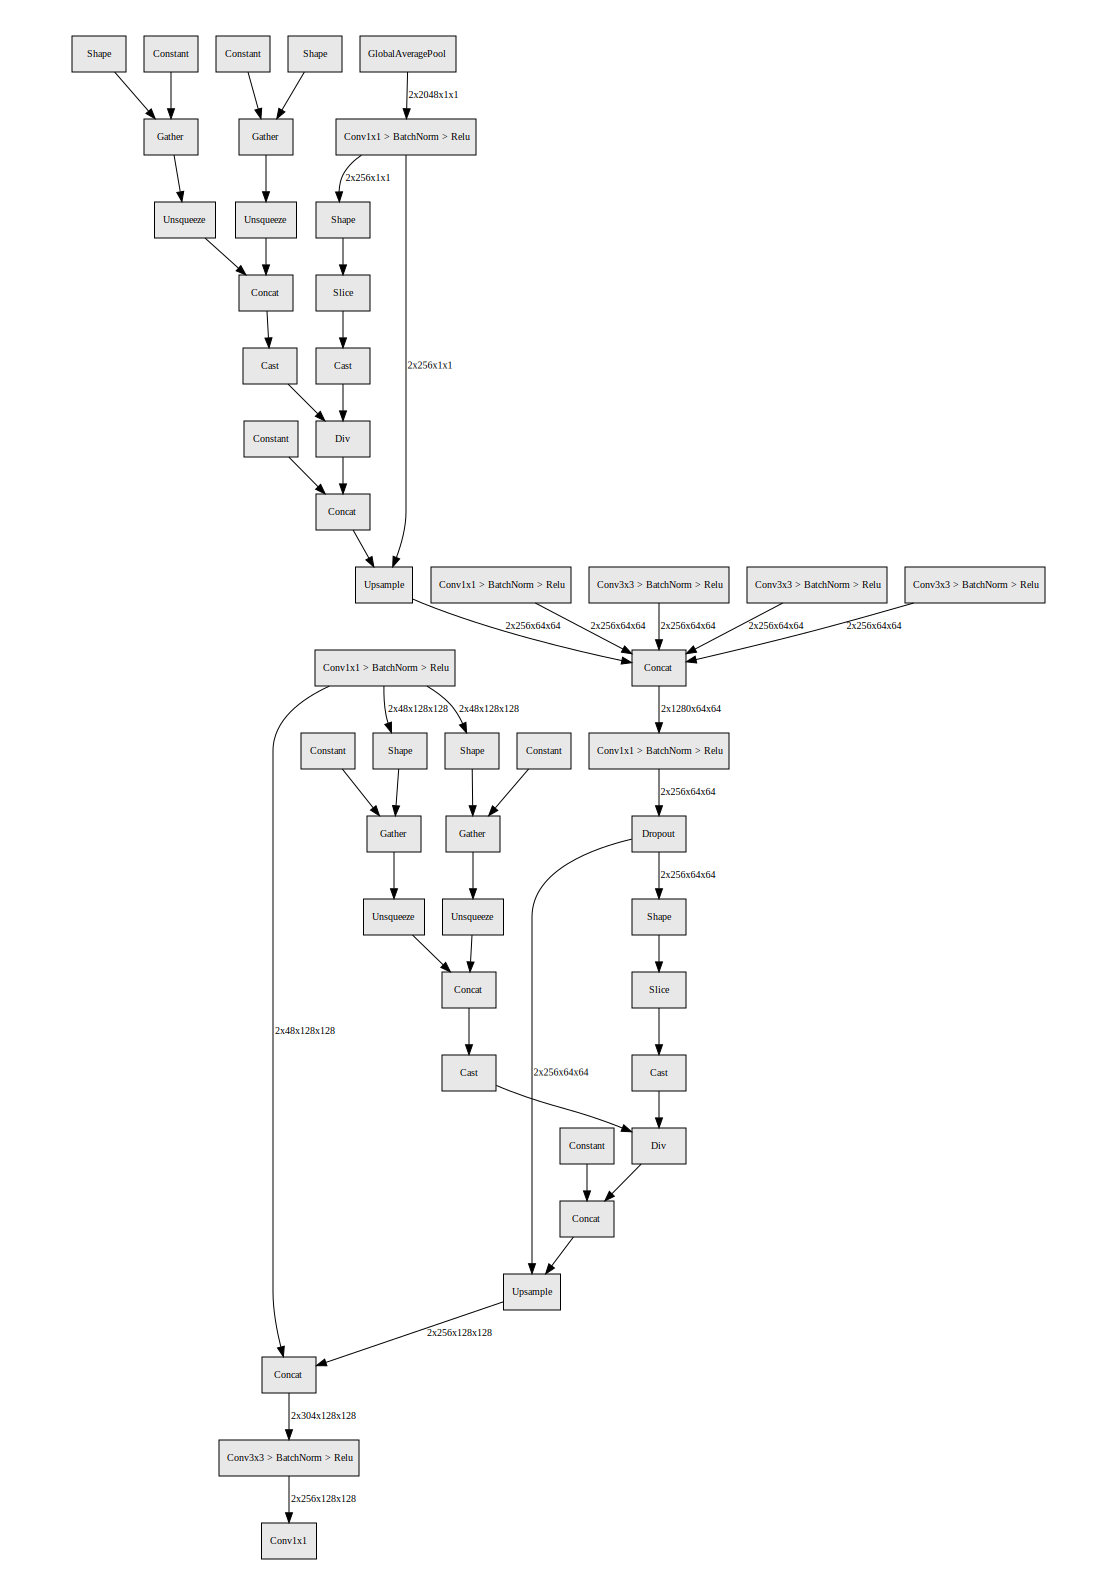

In [45]:
dot=classifier_graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown

dot

In [46]:
dot.render(filename='deeplabv3plus_classifier_architecture', format='png')

'deeplabv3plus_classifier_architecture.png'

In [19]:
help(dot.save)

Help on method save in module graphviz.files:

save(filename=None, directory=None) method of graphviz.dot.Digraph instance
    Save the DOT source to file. Ensure the file ends with a newline.
    
    Args:
        filename: Filename for saving the source (defaults to ``name`` + ``'.gv'``)
        directory: (Sub)directory for source saving and rendering.
    Returns:
        The (possibly relative) path of the saved source file.



In [20]:
help(dot.render)

Help on method render in module graphviz.files:

render(filename=None, directory=None, view=False, cleanup=False, format=None, renderer=None, formatter=None, quiet=False, quiet_view=False) method of graphviz.dot.Digraph instance
    Save the source to file and render with the Graphviz engine.
    
    Args:
        filename: Filename for saving the source (defaults to ``name`` + ``'.gv'``)
        directory: (Sub)directory for source saving and rendering.
        view (bool): Open the rendered result with the default application.
        cleanup (bool): Delete the source file after rendering.
        format: The output format used for rendering (``'pdf'``, ``'png'``, etc.).
        renderer: The output renderer used for rendering (``'cairo'``, ``'gd'``, ...).
        formatter: The output formatter used for rendering (``'cairo'``, ``'gd'``, ...).
        quiet (bool): Suppress ``stderr`` output from the layout subprocess.
        quiet_view (bool): Suppress ``stderr`` output from the v

In [22]:
dot.render(filename='deeplabv3_classifier', format='png')

'deeplabv3_classifier.png'

In [18]:
dot.save(filename='deeplabv3_classifier')

'deeplabv3_classifier'

In [25]:
model.named_children

<bound method Module.named_children of DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU